In [3]:
import sounddevice as sd
from scipy.io.wavfile import write
import IPython.display as ipd

%matplotlib inline
import sklearn
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [4]:
def recorder(outfile):
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write(outfile, fs, myrecording)  # Save as WAV file     

In [5]:
ipd.Audio('Voices/negative.wav')

In [30]:
x_pos , sr_pos = librosa.load('Voices/positive.wav')
x_neg , sr_neg = librosa.load('Voices/negative.wav')
x_anc , sr_anc = librosa.load('Voices/levioza-origin.wav')

In [8]:
type(sr_pos)

int

In [32]:
def waveplot(x, sr):
    plt.figure(figsize=(20, 5))
    librosa.display.waveplot(x, sr=sr)

In [33]:
def specto_plot(x, sr, y_axis='hz'):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis=y_axis)
    plt.colorbar()

In [36]:
def to_mfcc(x, sr):
    return librosa.feature.mfcc(x, sr=sr)

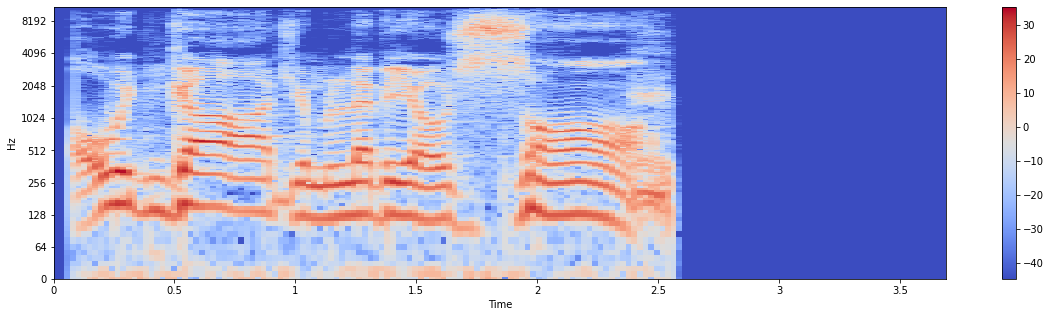

In [37]:
specto_plot(x_anc, sr_anc, 'log')

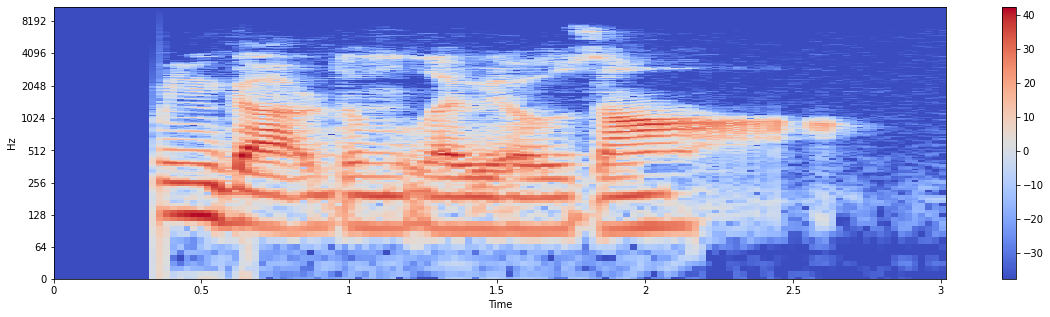

In [38]:
specto_plot(x_pos, sr_pos, 'log')

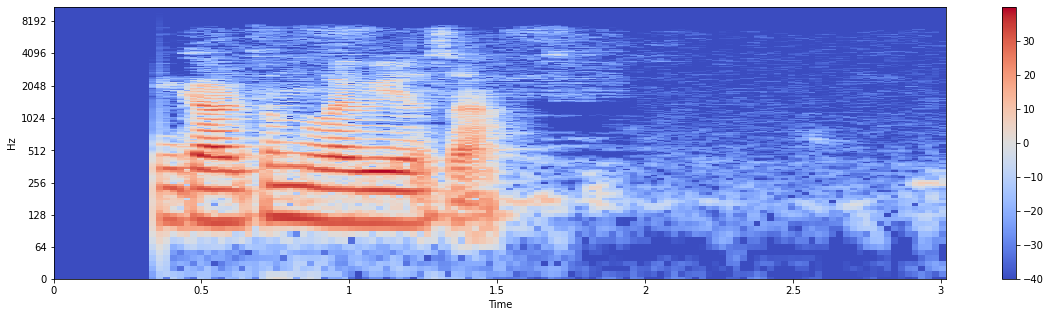

In [39]:
specto_plot(x_neg, sr_neg, 'log')

In [16]:
mfcc_anc = to_mfcc(x_anc, sr_anc)
mfcc_pos = to_mfcc(x_pos, sr_pos)
mfcc_neg = to_mfcc(x_neg, sr_neg)

In [17]:
xsim_pos = librosa.segment.cross_similarity(mfcc_anc, mfcc_pos, metric='cosine')
xsim_neg = librosa.segment.cross_similarity(mfcc_anc, mfcc_neg, metric='cosine')

In [19]:
print(xsim_pos)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ... False False False]
 [ True  True  True ...  True  True  True]]


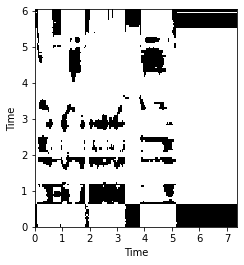

In [20]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(xsim_pos, x_axis='time', y_axis='time', hop_length=1024)

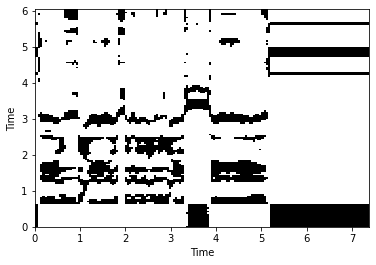

In [21]:
librosa.display.specshow(xsim_neg, x_axis='time', y_axis='time', hop_length=1024)

#### Filtering voice

In [2]:
from io import BytesIO
import tempfile
import requests
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

/home/nikalosa/.local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [31]:
play(x_anc, sr_anc)

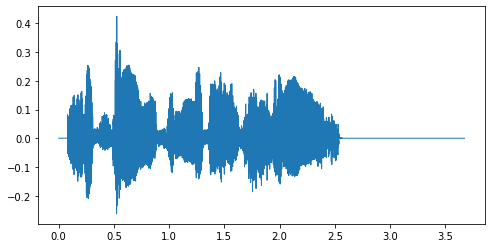

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x_anc) / sr_anc, len(x_anc))
ax.plot(t, x_anc, lw=1)

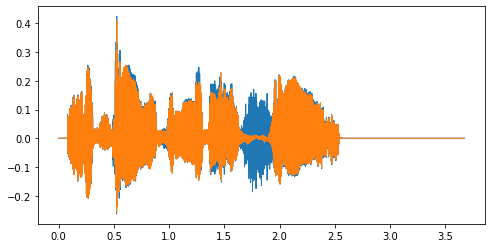

In [38]:
b, a = sg.butter(4, 2000. / (sr_anc / 2.), 'low')
x_fil = sg.filtfilt(b, a, x_anc)
play(x_fil, sr_anc)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x_anc, lw=1)
ax.plot(t, x_fil, lw=1)

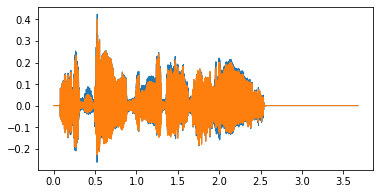

In [37]:
b, a = sg.butter(4, 150. / (sr_anc / 2.), 'high')
x_fil = sg.filtfilt(b, a, x_anc)
play(x_fil, sr_anc)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(t, x_anc, lw=1)
ax.plot(t, x_fil, lw=1)

In [39]:
play(x_fil, sr_anc)

In [ ]:
def filter_voice():
    